In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale=1.5)

# feature names
time = 'Runtime (s)'
memory = 'Max memory (kb)'

# read and show data
results = pd.read_csv('../results/2019-07-03_10-35-02_laptop.csv')
results.head()

,Runtime (s),Max memory (kb)
0,1.03,32624
1,1.39,32604
2,1.34,32612
3,1.76,32624
4,1.60,32604


In [11]:
# add num vnfs column
results['VNFs'] = [i for i in range(results.shape[0])]
results.head()

,Runtime (s),Max memory (kb),VNFs
0,1.03,32624,0
1,1.39,32604,1
2,1.34,32612,2
3,1.76,32624,3
4,1.60,32604,4


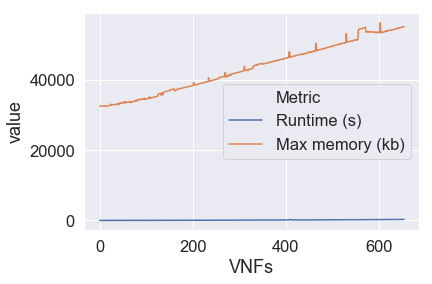

In [12]:
# transform into long format and plot
results_long = pd.melt(results, ['VNFs'], var_name='Metric')
sns.lineplot(x='VNFs', y='value', hue='Metric', data=results_long)

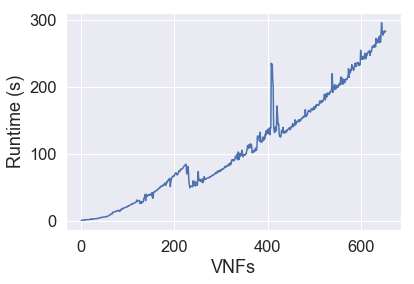

In [13]:
# plot runtime
plot = sns.lineplot(x='VNFs', y=time, data=results)
plot.get_figure().savefig('runtime_line.png', bbox_inches='tight', dpi=400)

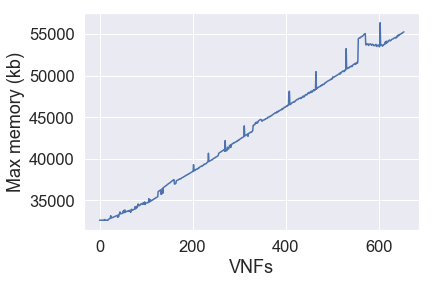

In [14]:
# plot memory
plot = sns.lineplot(x='VNFs', y=memory, data=results)
plot.get_figure().savefig('memory_line.png', bbox_inches='tight', dpi=400)

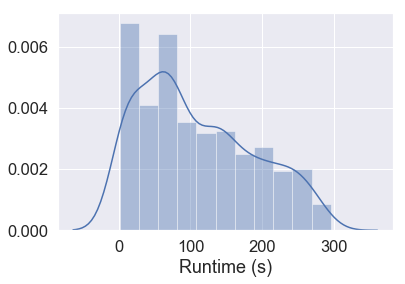

In [15]:
plot = sns.distplot(results[time])
plot.get_figure().savefig('runtime_dist.png', bbox_inches='tight', dpi=400)

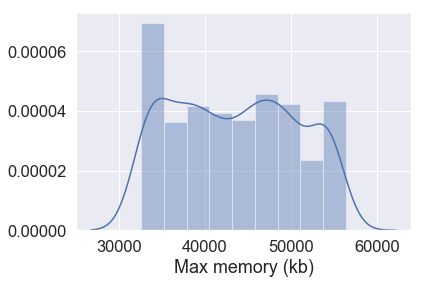

In [16]:
plot = sns.distplot(results[memory])
plot.get_figure().savefig('memory_dist.png', bbox_inches='tight', dpi=400)

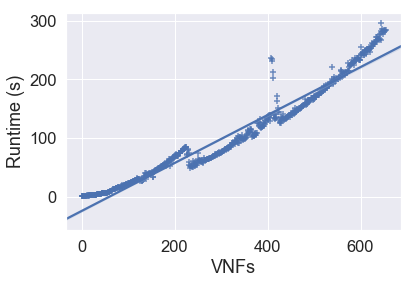

In [17]:
plot = sns.regplot(x='VNFs', y=time, data=results, marker='+')
plot.get_figure().savefig('runtime_reg.png', bbox_inches='tight', dpi=400)

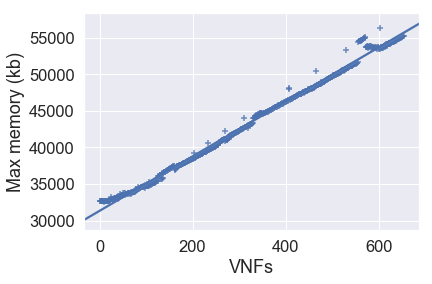

In [18]:
plot = sns.regplot(x='VNFs', y=memory, data=results, marker='+')
plot.get_figure().savefig('memory_reg.png', bbox_inches='tight', dpi=400)